In [8]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("AB_NYC_2019.csv")

In [101]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Neighbourhood Group'a göre ilanların dağılımı

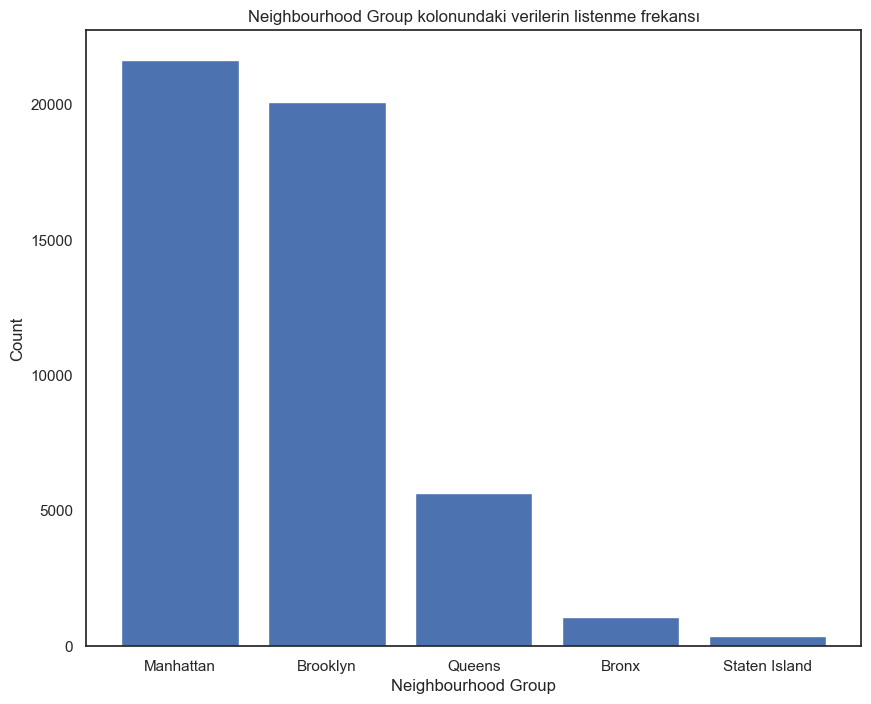

In [217]:
neighbourhood_group_counts = df["neighbourhood_group"].value_counts()

plt.bar(neighbourhood_group_counts.index, neighbourhood_group_counts.values)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.title("Neighbourhood Group kolonundaki verilerin listenme frekansı")
plt.show()

In [13]:
neighbourhood_group_counts = df.groupby("neighbourhood_group")['id'].nunique().reset_index(name="Total")

neighbourhood_group_counts

,neighbourhood_group,Total
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


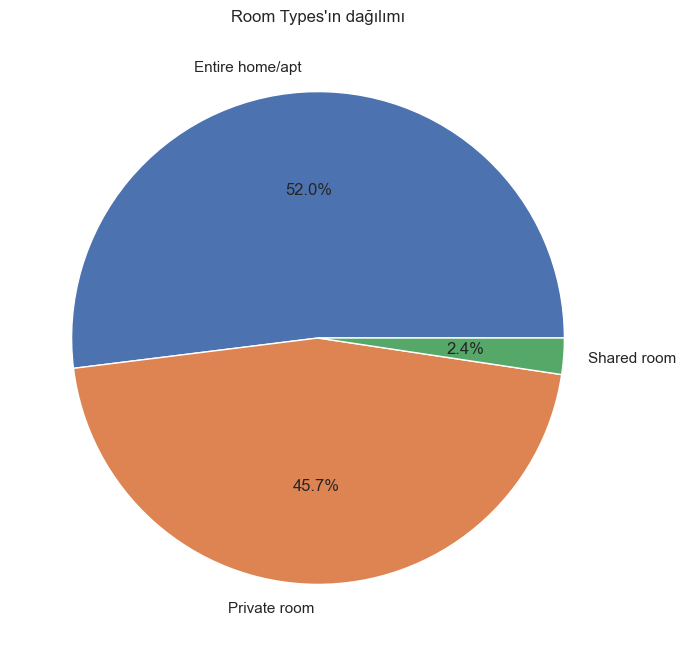

In [219]:


room_type_counts = df['room_type'].value_counts()

plt.pie(room_type_counts.values, labels=room_type_counts.index, autopct='%1.1f%%')
plt.title("Room Types'ın dağılımı")
plt.show()

## Listenen ürünlerden beklenen gelir oranları

In [15]:
room_type_prices = df.groupby('room_type')["price"].sum().reset_index(name= "Price")

fig = px.pie(room_type_prices, values='Price', names='room_type', title='Total Price by Room Type')
fig.show()

In [222]:
room_type_revenue = df.groupby(['neighbourhood_group', 'room_type'])['price'].sum().reset_index(name='Revenue')

fig = px.bar(room_type_revenue, x='neighbourhood_group', y='Revenue', color='room_type', title='Semtlere göre listelenen ilanlardan beklenen total gelirler')
fig.show()

## Room type'a göre listenen ürünlerden ortalama beklenen gelirler. 
## Genede en yüksek fiyat etiketine sahip room type türü Entire home/apt

In [16]:
room_type_mean_prices = df.groupby('room_type')['price'].mean().reset_index(name="Mean Price")

fig = px.bar(room_type_mean_prices, x='room_type', y='Mean Price', title='Mean Price by Room Type')
fig.show()

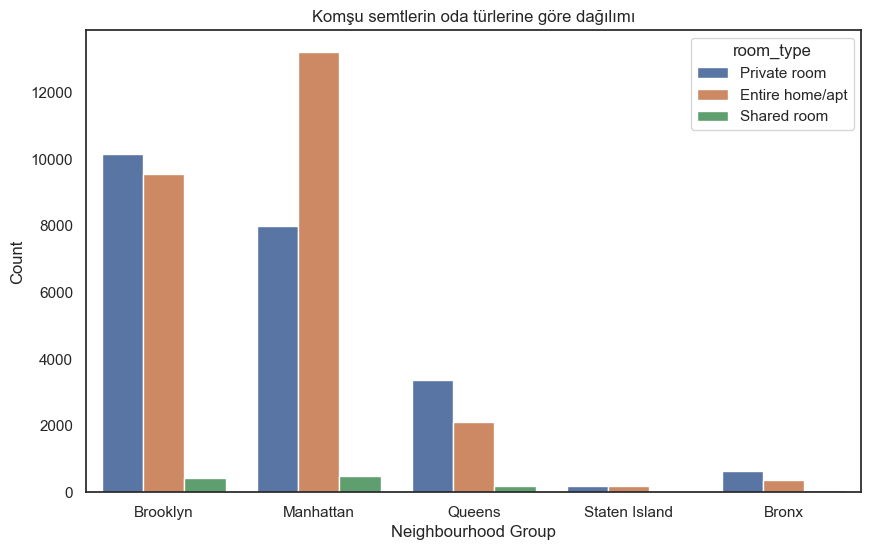

In [220]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="neighbourhood_group", hue="room_type")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.title("Komşu semtlerin oda türlerine göre dağılımı")
plt.show()

In [19]:
df.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


## Bütün 5 ilçenin price'a göre dağılımı görüldüğü üzere aykırı değerler dağılımdan bir anlam çıkarmamızı engelliyor


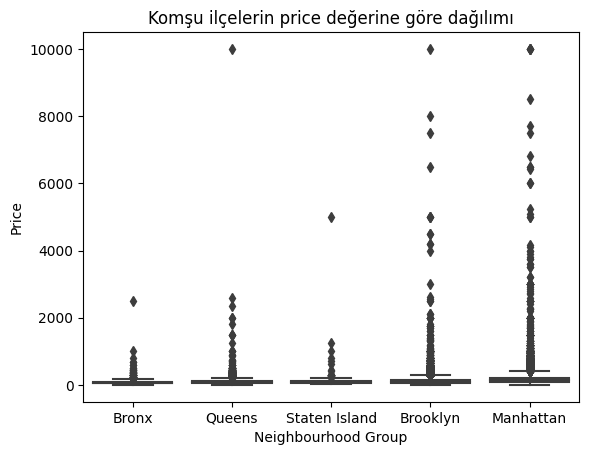

In [20]:
sns.boxplot(x="neighbourhood_group", y="price", data=df, order=df.groupby("neighbourhood_group")["price"].median().sort_values().index)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.title("Komşu ilçelerin price değerine göre dağılımı")
plt.show()

# Bu yüzden her semtin IQR değerleri hesaplanarak yeni bir kutu grafiği oluşturuldu

### Bu Python kodunda, New York şehrindeki beş farklı semtin ev kira fiyatlarındaki aykırı değerler belirlenerek yeni bir kutu grafiği oluşturulmuştur. Her bir semtin IQR değerleri hesaplanarak, aykırı değerlerin sınırları belirlenmiş ve bu değerler dışındaki veriler görselleştirilmiştir. Böylece, semtler arasındaki ev kira fiyatlarının dağılımı ve aykırı değerlerin tespiti kolaylıkla görülebilir hale getirilmiştir.

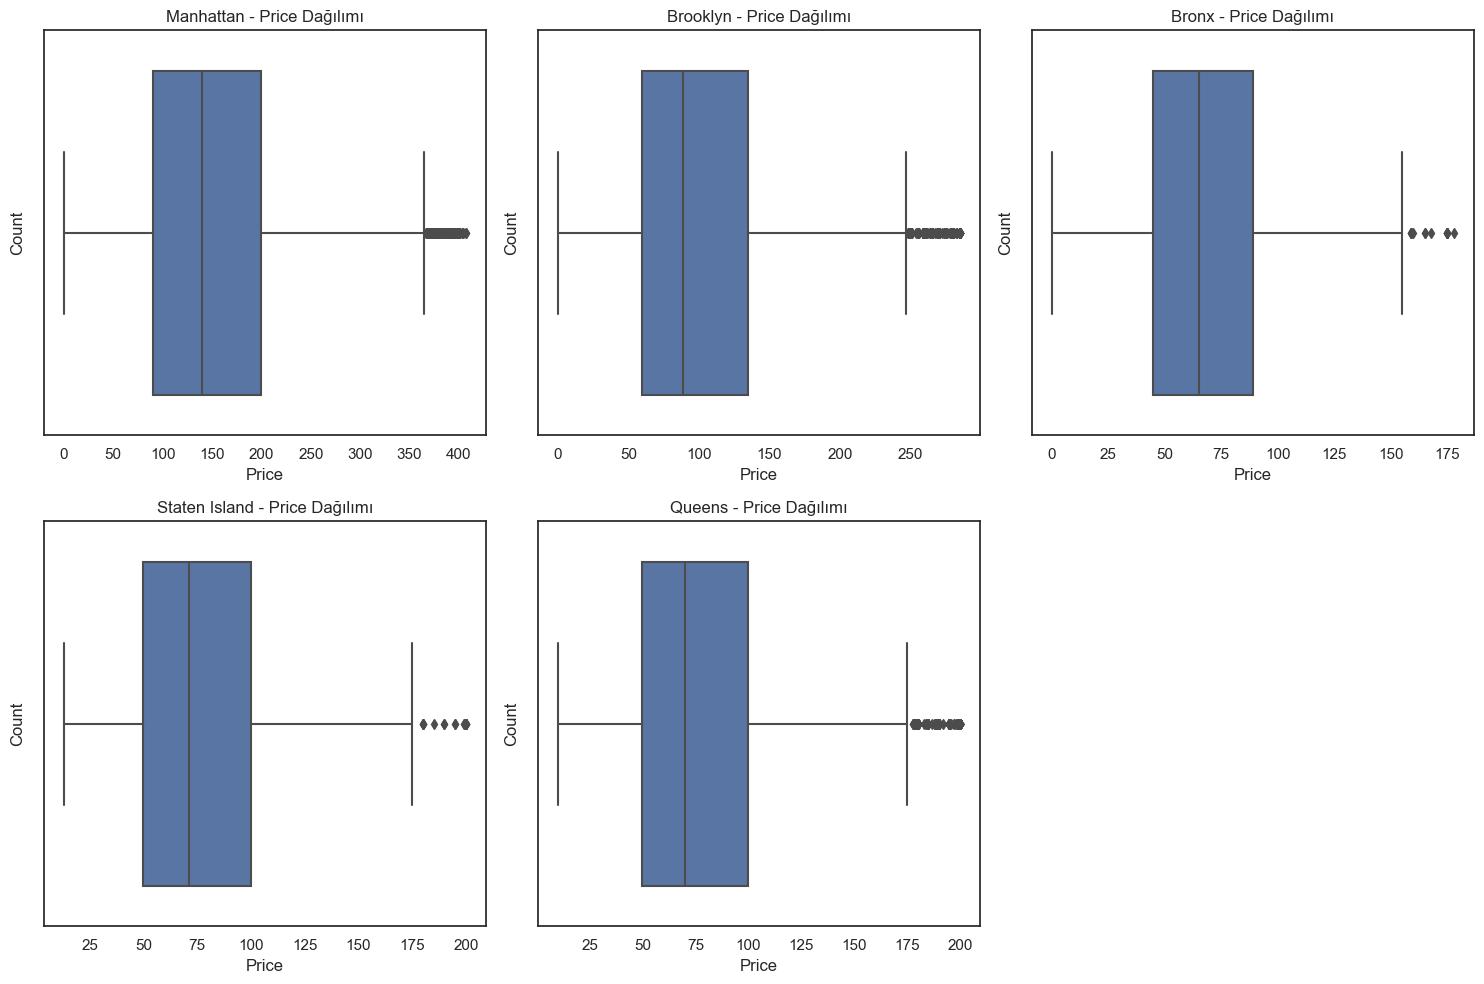

In [125]:
selected_neighbourhoods = ['Manhattan', 'Brooklyn', 'Bronx', 'Staten Island', 'Queens']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, selected_neighbourhood in enumerate(selected_neighbourhoods):
    if i < len(axs):  # Check if the index is within the bounds of axs
        ax = axs[i]
        
        df_neighbourhood = df[df['neighbourhood_group'] == selected_neighbourhood]
        df_neighbourhood_price = df_neighbourhood['price']
        Q1_df_neighbourhood_price = df_neighbourhood_price.quantile(0.25)
        Q3_df_neighbourhood_price = df_neighbourhood_price.quantile(0.75)
        IQR_df_neighbourhood_price = Q3_df_neighbourhood_price - Q1_df_neighbourhood_price

        lower_limit_df_neighbourhood_price = Q1_df_neighbourhood_price - 1.5 * IQR_df_neighbourhood_price
        upper_limit_df_neighbourhood_price = Q3_df_neighbourhood_price + 1.5 * IQR_df_neighbourhood_price

        df_neighbourhood_price = df_neighbourhood_price[(df_neighbourhood_price >= lower_limit_df_neighbourhood_price) & (df_neighbourhood_price <= upper_limit_df_neighbourhood_price)]

        sns.boxplot(x=df_neighbourhood_price, ax=ax)
        ax.set_xlabel("Price")
        ax.set_ylabel("Count")
        ax.set_title(f"{selected_neighbourhood} - Price Dağılımı")

# Remove the empty subplot for Queens
fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

## En çok ilana sahip 10 kişi

[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

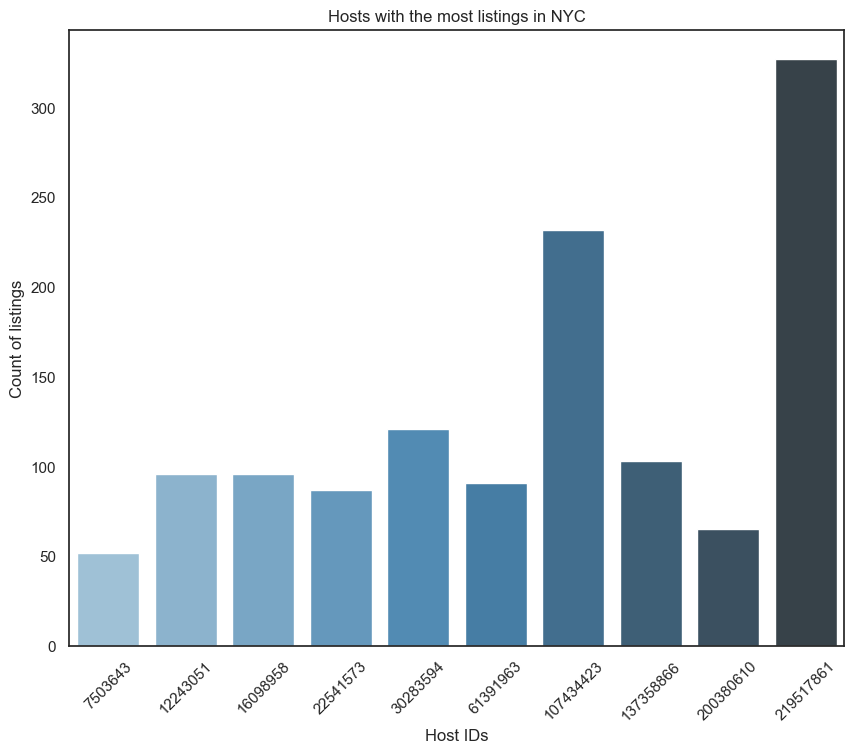

In [109]:
top_host = df['host_id'].value_counts().head(10)


sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)

viz_1 = sns.barplot(x="Host_ID", y="P_Count", data=top_host_df, palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [191]:
df_ids = [219517861,107434423,30283594,137358866,16098958,12243051,12243051,61391963,22541573,200380610,7503643]
df_filtered_host_id = df[df['host_id'].isin(df_ids)]
df_filtered_host_id


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,Count_mean_neighbourhood,price_count_std,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_count
2631,1390532,Amazing Designer Loft in BK Factory,7503643,Vida,Brooklyn,Greenpoint,40.72456,-73.94343,Entire home/apt,129,144.822422,-15.822422,30,7,2019-03-27,0.11,52,189,-15.822422
2636,1392673,Spacious Factory Converted Loft,7503643,Vida,Brooklyn,Greenpoint,40.72756,-73.94230,Entire home/apt,129,144.822422,-15.822422,30,6,2018-09-02,0.09,52,249,-15.822422
2708,1460017,Lovely Factory Loft in Greenpoint!,7503643,Vida,Brooklyn,Greenpoint,40.72732,-73.94076,Entire home/apt,129,144.822422,-15.822422,30,6,2018-09-11,0.08,52,277,-15.822422
2749,1486099,All New Bohemian Chic 1BR Loft,7503643,Vida,Brooklyn,Greenpoint,40.72267,-73.94362,Entire home/apt,149,144.822422,4.177578,30,9,2018-02-18,0.13,52,343,4.177578
2782,1524302,Huge 1 Bedroom Loft at Habitat 101!,7503643,Vida,Brooklyn,Greenpoint,40.72686,-73.94177,Entire home/apt,149,144.822422,4.177578,30,7,2018-10-31,0.11,52,281,4.177578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48723,36404684,Smart Nolita 1BR w/ W/D near famous cafes by B...,107434423,Blueground,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt,316,230.138340,85.861660,30,0,NaN,NaN,232,325,85.861660
48724,36404784,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt,385,204.794178,180.205822,30,0,NaN,NaN,232,338,180.205822
48725,36404815,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt,267,204.794178,62.205822,30,0,NaN,NaN,232,228,62.205822
48726,36404936,Beautiful Williamsburg 2BR w/ Skyline views + ...,107434423,Blueground,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt,278,143.802806,134.197194,30,0,NaN,NaN,232,188,134.197194


## En çok ilana sahip 10 kişi büyük çoğunlukla Manhattan da Entire home/apt türü ilanlar vermiş

In [229]:
df_filtered_host_id.groupby('neighbourhood_group')['room_type'].value_counts().reset_index(name='Count')


,neighbourhood_group,room_type,Count
0,Brooklyn,Entire home/apt,55
1,Brooklyn,Private room,6
2,Manhattan,Entire home/apt,1105
3,Manhattan,Private room,25
4,Queens,Private room,79


## Görüntülenme sayısında' bir aykırı değer problemimiz var

In [210]:
df['number_of_reviews'].describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

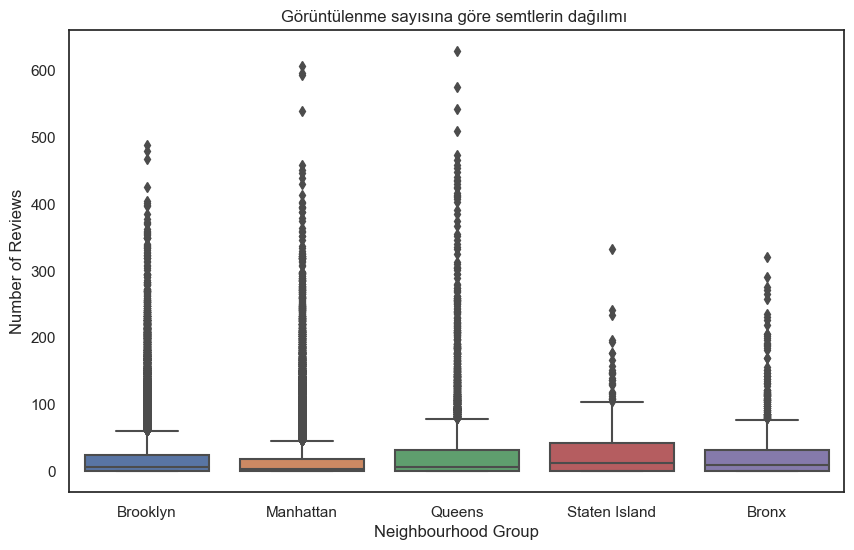

In [230]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='number_of_reviews', data=df)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')
plt.title('Görüntülenme sayısına göre semtlerin dağılımı ')
plt.show()

## Bu yüzden tekrardan bir IQR grafiği oluşturarak yeni bir kutu grafiği ile Number of Reviews verisini daha anlaşılır yaptık sadece verinin %8' ini gözardı ederek

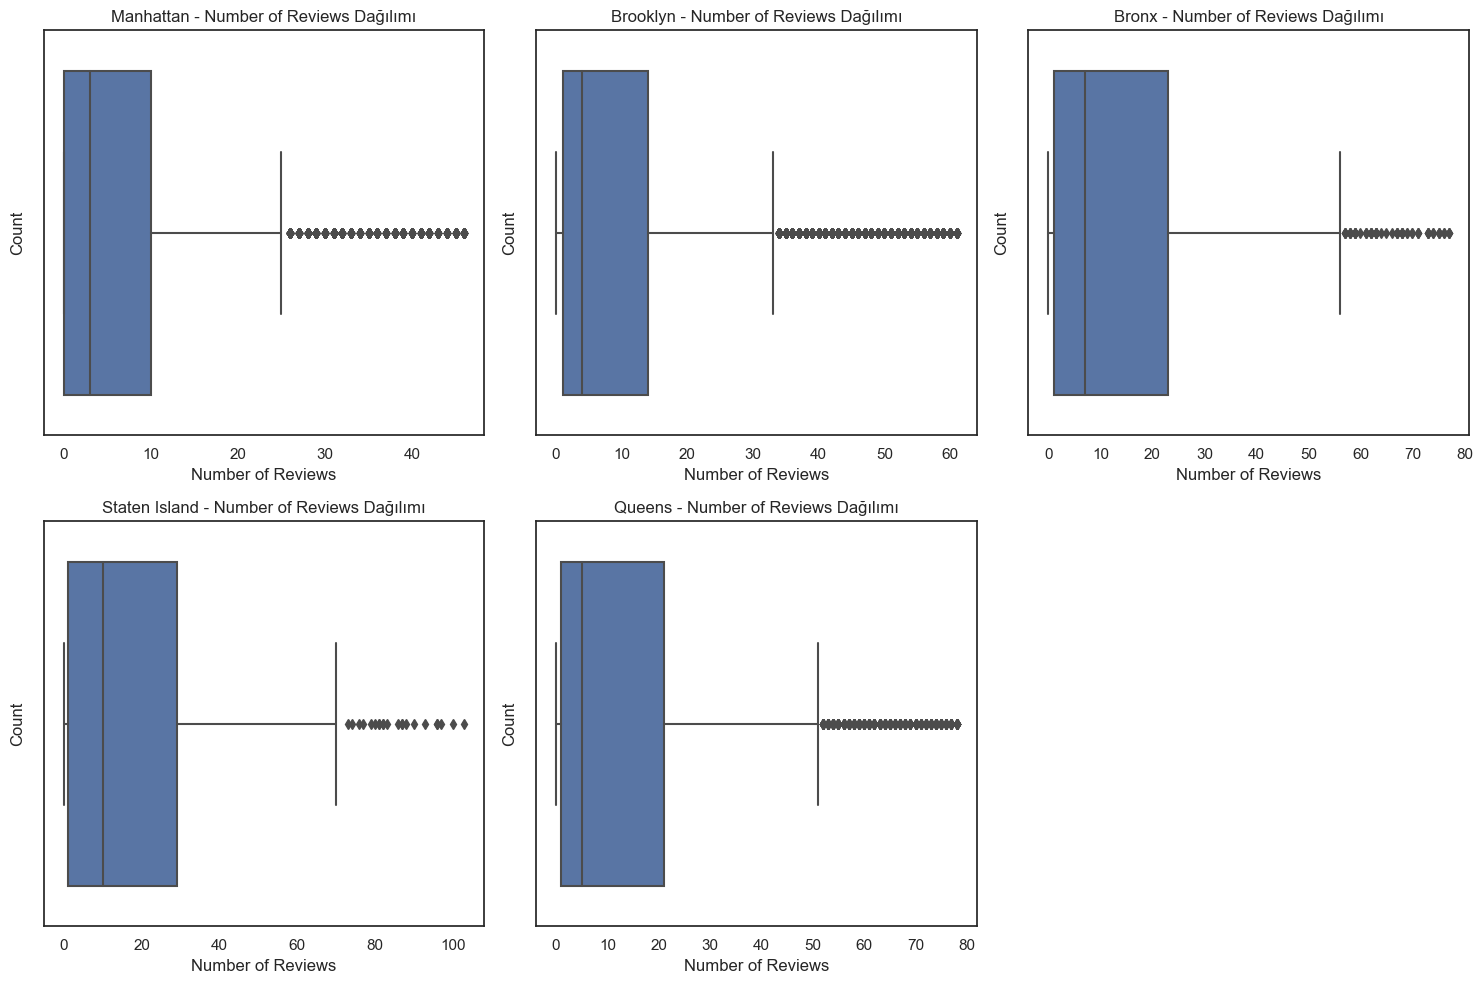

In [239]:
selected_neighbourhoods = ['Manhattan', 'Brooklyn', 'Bronx', 'Staten Island', 'Queens']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, selected_neighbourhood in enumerate(selected_neighbourhoods):
    if i < len(axs):  # Check if the index is within the bounds of axs
        ax = axs[i]
        
        df_neighbourhood = df[df['neighbourhood_group'] == selected_neighbourhood]
        df_neighbourhood_reviews = df_neighbourhood['number_of_reviews']
        Q1_df_neighbourhood_reviews = df_neighbourhood_reviews.quantile(0.25)
        Q3_df_neighbourhood_reviews = df_neighbourhood_reviews.quantile(0.75)
        IQR_df_neighbourhood_reviews = Q3_df_neighbourhood_reviews - Q1_df_neighbourhood_reviews

        lower_limit_df_neighbourhood_reviews = Q1_df_neighbourhood_reviews - 1.5 * IQR_df_neighbourhood_reviews
        upper_limit_df_neighbourhood_reviews = Q3_df_neighbourhood_reviews + 1.5 * IQR_df_neighbourhood_reviews

        df_neighbourhood_reviews = df_neighbourhood_reviews[(df_neighbourhood_reviews >= lower_limit_df_neighbourhood_reviews) & (df_neighbourhood_reviews <= upper_limit_df_neighbourhood_reviews)]

        sns.boxplot(x=df_neighbourhood_reviews, ax=ax)
        ax.set_xlabel("Number of Reviews")
        ax.set_ylabel("Count")
        ax.set_title(f"{selected_neighbourhood} - Number of Reviews Dağılımı")

# Remove the empty subplot for Queens
fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

## Peki en çok ilana sahip 10 kişinin görüntülenme ortalaması ile genel ortalama arasında ne gibi farkalr var?

 En çok ilana sahip 10 kişinin görüntülenme ortalaması

In [142]:
df_filtered_host_id['number_of_reviews'].mean()

1.8566929133858268

Genel ilanların görüntülenme ortalaması

In [143]:
df['number_of_reviews'].mean()

23.274465691788528

# Peki neden en çok ilan veren kişilerin görüntülenme ortalaması genel ortalamadan düşük

## Bunun için Her bölgenin ortalama price değerini yeni bir kolon olarak ekleyip ve bu değeri price değerinden çıkartıp ilan veren kişilerin ilanlarının ortalama değerin altında olup olmadığını kontrol edelim.

In [231]:
df['price_count'] = df['price'] - df['Count_mean_neighbourhood']
df['Count_mean_neighbourhood'] = df.groupby(['neighbourhood_group', 'neighbourhood'])['price'].transform('mean')
df = df[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'Count_mean_neighbourhood','price_count_std' ,'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,Count_mean_neighbourhood,price_count_std,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,92.885714,56.114286,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,282.719094,-57.719094,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,118.974041,31.025959,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,181.893357,-92.893357,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,133.198747,-53.198747,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,107.678244,-37.678244,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,84.800406,-44.800406,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,118.974041,-3.974041,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,204.794178,-149.794178,1,0,NaN,NaN,6,2


## IQR değerini hesaplarken bulduğumuz üst limite göre ilan veren kişilerin ilanlarının görüntülenme ortalamalarına bakalım

In [252]:
df[df['number_of_reviews']<=78].describe()

,id,host_id,latitude,longitude,price,Count_mean_neighbourhood,price_count_std,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.465800e+04,4.465800e+04,44658.000000,44658.000000,44658.000000,44658.000000,44658.000000,44658.000000,44658.000000,34606.000000,44658.000000,44658.000000
mean,1.992246e+07,7.061782e+07,40.729114,-73.952584,155.145483,153.567865,1.577618,7.387254,11.987639,1.119603,7.626987,107.125442
std,1.083526e+07,8.041314e+07,0.054471,0.045873,249.509660,62.915606,241.094467,21.234184,17.405582,1.433697,34.435801,131.601594
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,47.333333,-430.638418,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.016425e+07,8.571486e+06,40.690800,-73.983190,69.000000,107.678244,-63.974041,1.000000,1.000000,0.160000,1.000000,0.000000
50%,2.091255e+07,3.294202e+07,40.723450,-73.956070,108.000000,143.802806,-30.444444,3.000000,4.000000,0.550000,1.000000,32.000000
75%,2.989888e+07,1.151477e+08,40.763100,-73.936840,180.000000,188.948276,16.801253,5.000000,15.000000,1.540000,2.000000,207.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,800.000000,9882.812222,1250.000000,78.000000,20.940000,327.000000,365.000000


## Görüldüğü gibi number_of_reviews' 78 üzerinde olan 4307 ilanlar aslında, bulundukları bölgelerin ortalama 16 $ altında fiyat veriyor buda görüntülenme sayılarını arttıryor.

In [246]:
df[df['number_of_reviews']>=78]['price_count_std'].mean()

-16.346128270835788

## En çok ilana sahip olan 10 kişinin ortalaması genel ortalamanın 1.85 $ üzerinde fiyat verdiklerini gösteriyor

In [255]:
df_filtered_host_id['number_of_reviews'].mean()

1.8566929133858268

## number_of_reviews ı 78 in altında olan 44658 ilanın ortalaması ise genel ortalamanın 1 $ üzerinde 
# Yani genel olarak ortalamanın ne kadar üzerinde fiyat veriyorsanız görüntülenme sayınız o kadar artıyor.
# Bunu korelasyon haritasından da gözlemleyebilirsiniz.

In [248]:
df[df['number_of_reviews']<=78]['price_count_std'].mean()

1.5776179689199195

## En çok ilan veren 10 kişinin ilan verdiği bölgeler ve ilan adetleri

In [160]:
df_filtered_host_id.groupby(['neighbourhood_group','neighbourhood']).size().reset_index(name='count')

,neighbourhood_group,neighbourhood,count
0,Brooklyn,Bushwick,6
1,Brooklyn,DUMBO,1
2,Brooklyn,Downtown Brooklyn,1
3,Brooklyn,Greenpoint,52
4,Brooklyn,Williamsburg,1
5,Manhattan,Battery Park City,3
6,Manhattan,Chelsea,96
7,Manhattan,East Harlem,6
8,Manhattan,East Village,20
9,Manhattan,Financial District,318


## En çok ilana sahip kişiler genelde Manhattan bölgesini tercih ederken genel ağırlık biraz daha Brooklyn bölgesine yoğunlaşıyor

In [157]:
df.groupby(['neighbourhood_group','neighbourhood']).size().reset_index(name='count')



,neighbourhood_group,neighbourhood,count
0,Bronx,Allerton,42
1,Bronx,Baychester,7
2,Bronx,Belmont,24
3,Bronx,Bronxdale,19
4,Bronx,Castle Hill,9
...,...,...,...
216,Staten Island,Tottenville,7
217,Staten Island,West Brighton,18
218,Staten Island,Westerleigh,2
219,Staten Island,Willowbrook,1


In [262]:
import pandas as pd

# Assuming df_filtered_new is a DataFrame object
df_filtered_new = pd.DataFrame(df)

df_filtered_new.drop(['id', 'name', 'host_name'], axis=1, inplace=True)

In [264]:
# Convert categorical variables to numerical variables
df_filtered_new['neighbourhood_group'] = df_filtered_new['neighbourhood_group'].astype('category').cat.codes
df_filtered_new['neighbourhood'] = df_filtered_new['neighbourhood'].astype('category').cat.codes
df_filtered_new['room_type'] = df_filtered_new['room_type'].astype('category').cat.codes

df_filtered_new

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,Count_mean_neighbourhood,price_count_std,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,108,40.64749,-73.97237,1,149,92.885714,56.114286,1,9,2018-10-19,0.21,6,365
1,2845,2,127,40.75362,-73.98377,0,225,282.719094,-57.719094,1,45,2019-05-21,0.38,2,355
2,4632,2,94,40.80902,-73.94190,1,150,118.974041,31.025959,3,0,NaN,NaN,1,365
3,4869,1,41,40.68514,-73.95976,0,89,181.893357,-92.893357,1,270,2019-07-05,4.64,1,194
4,7192,2,61,40.79851,-73.94399,0,80,133.198747,-53.198747,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,1,13,40.67853,-73.94995,1,70,107.678244,-37.678244,2,0,NaN,NaN,2,9
48891,6570630,1,28,40.70184,-73.93317,1,40,84.800406,-44.800406,4,0,NaN,NaN,2,36
48892,23492952,2,94,40.81475,-73.94867,0,115,118.974041,-3.974041,10,0,NaN,NaN,1,27
48893,30985759,2,95,40.75751,-73.99112,2,55,204.794178,-149.794178,1,0,NaN,NaN,6,2


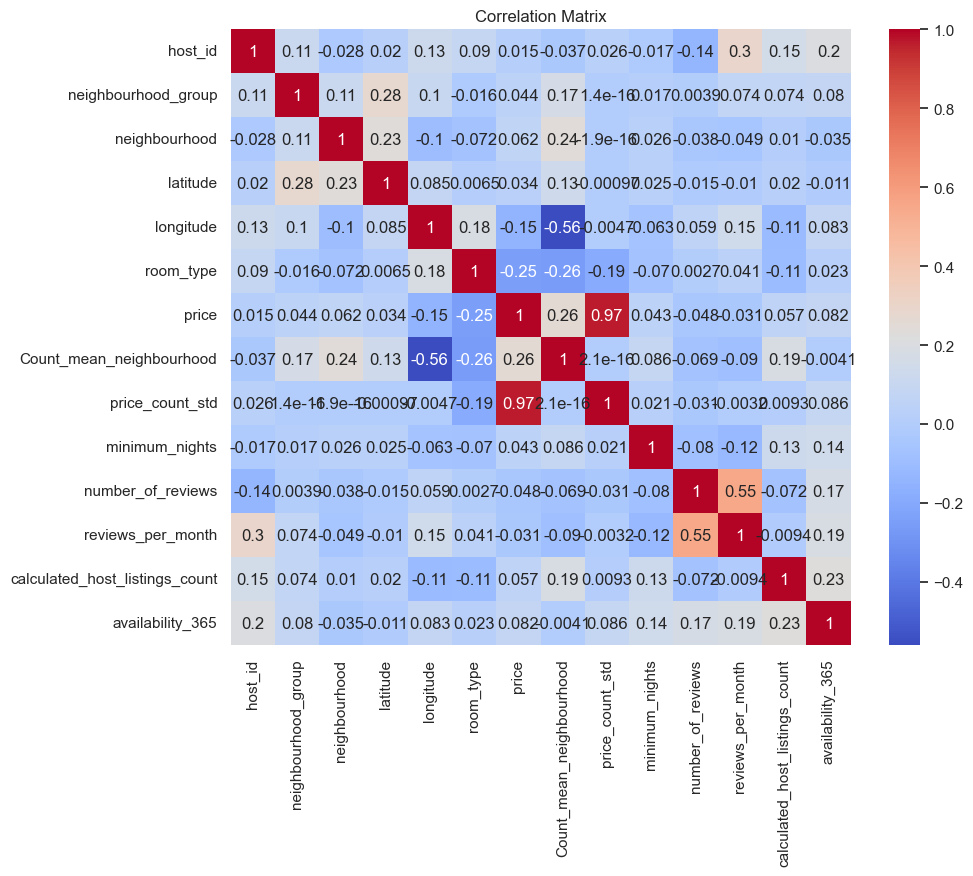

In [265]:


correlation_matrix = df_filtered_new.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Fiyatların New York haritasında dağılımı

In [291]:
import plotly.express as px
# hesapladığımız IQR değerinin üst limiti 200$ dolar olan ilanlar gözardı edildi yani verinin %18 lik bir kısmı
newaxdf=df[df['price']<=200]
# Create a scatter plot using latitude and longitude values from df_filtered_new
fig = px.scatter(newaxdf, x='longitude', y='latitude', color='price', opacity=0.5)

# Set the x and y axis labels
fig.update_xaxes(title='Longitude')
fig.update_yaxes(title='Latitude')

# Set the title of the plot
fig.update_layout(title='Scatter Plot of New York')

# Display the plot
fig.show()